Importing all necessary libraries

In [ ]:
!pip install split-folders
import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import tensorflow as tf

Load dataset

In [ ]:
import zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip /content/drive/My\ Drive/Flowers-Dataset.zip 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/My Drive/Flowers-Dataset.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Split dataset into training data, validation data, testing data

In [ ]:
splitfolders.ratio("/content/flowers", output="/content/flowers", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

Copying files: 4317 files [00:01, 3694.23 files/s]


Image Augmentation

In [ ]:
import keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
gentrain=train_datagen.flow_from_directory("/content/flowers/train",target_size=(64,64),class_mode="categorical",batch_size=100)

Found 3452 images belonging to 5 classes.


In [ ]:
gentest=test_datagen.flow_from_directory("/content/flowers/val",target_size=(64,64),class_mode="categorical",batch_size=100)

Found 430 images belonging to 5 classes.


In [ ]:
genval=test_datagen.flow_from_directory("/content/flowers/test",target_size=(64,64),class_mode="categorical",batch_size=100)

Found 435 images belonging to 5 classes.


Create model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
model=Sequential()

Add layers

In [ ]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,kernel_initializer="random_uniform",activation="relu"))
model.add(Dense(5,kernel_initializer="random_uniform",activation="softmax"))

Compile model

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

Fit the model

In [ ]:
model.fit_generator(gentrain,steps_per_epoch=15,epochs=30,validation_data=gentest,validation_steps=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/30
15/15 [==============================] - ETA: 0s - loss: 1.0158 - accuracy: 0.6027

15/15 [==============================] - 13s 867ms/step - loss: 1.0158 - accuracy: 0.6027 - val_loss: 1.0514 - val_accuracy: 0.6093
Epoch 2/30
15/15 [==============================] - 10s 665ms/step - loss: 0.9545 - accuracy: 0.6220
Epoch 3/30
15/15 [==============================] - 10s 656ms/step - loss: 0.9348 - accuracy: 0.6347
Epoch 4/30
15/15 [==============================] - 10s 675ms/step - loss: 0.9333 - accuracy: 0.6253
Epoch 5/30
15/15 [==============================] - 11s 721ms/step - loss: 0.9238 - accuracy: 0.6460
Epoch 6/30
15/15 [==============================] - 10s 644ms/step - loss: 0.8809 - accuracy: 0.6563
Epoch 7/30
15/15 [==============================] - 10s 666ms/step - loss: 0.8613 - accuracy: 0.6715
Epoch 8/30
15/15 [==============================] - 12s 739ms/step - loss: 0.8220 - accuracy: 0.6707
Epoch 9/30
15/15 [==============================] - 10s 657ms/step - loss: 0.8181 - accuracy: 0.6933
Epoch 10/30
15/15 [==============================] - 10s 664

Save the model

In [ ]:
model.save("./flower.h5")

Test the model

In [75]:
from tensorflow.keras.preprocessing import image

In [95]:
img=image.load_img("/content/flowers/daisy/100080576_f52e8ee070_n.jpg",target_size=(64,64))

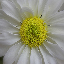

In [96]:
img

In [97]:
x=image.img_to_array(img)

In [98]:
x.shape

(64, 64, 3)

In [99]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 3)

In [100]:
prediction=model.predict(x)
class_name=["Daisy","Dandelion","Rose","Sunflower","Tulip"]
pred=prediction.argmax(axis=1)[0]
print(str(class_name[pred]))

Daisy
